# Fashion MNIST
#### El conjunto de datos Fashion MNIST es una alternativa moderna al clásico MNIST, diseñada para representar imágenes de artículos de moda en lugar de dígitos escritos a mano.

#### Este dataset es utilizado para probar modelos de clasificación de imágenes con redes neuronales. Contiene:
#### - 60,000 imágenes de entrenamiento y 10,000 imágenes de prueba.
#### - Cada imagen es en escala de grises de 28 × 28 píxeles.
#### - 10 clases, representando distintos tipos de ropa y accesorios.

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix, classification_report

## Cargar el Dataset Fashion MNIST

In [5]:
# Cargar Fashion MNIST desde Keras
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Mostrar dimensiones de los datos
print(f"Dimensiones de x_train: {x_train.shape}")  # (60000, 28, 28)
print(f"Dimensiones de x_test: {x_test.shape}")    # (10000, 28, 28)


Dimensiones de x_train: (60000, 28, 28)
Dimensiones de x_test: (10000, 28, 28)


## Visualizar Algunas Imágenes del Dataset

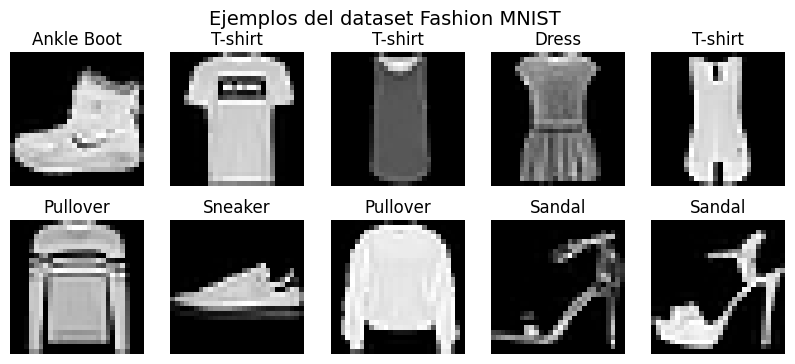

In [9]:
# Definir nombres de las clases
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Mostrar algunas imágenes de Fashion MNIST
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.suptitle("Ejemplos del dataset Fashion MNIST", fontsize=14)
plt.show()


## Visualizar la Distribución de Clases

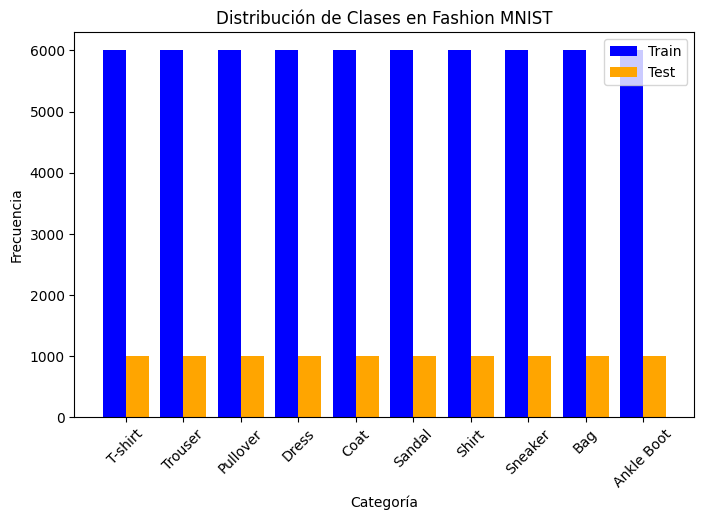

In [10]:
# Contar elementos por clase en los conjuntos de entrenamiento y prueba
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(unique_train - 0.2, counts_train, width=0.4, label="Train", color="blue")
ax.bar(unique_test + 0.2, counts_test, width=0.4, label="Test", color="orange")

# Personalizar gráfico
ax.set_xticks(unique_train)
ax.set_xticklabels(class_names, rotation=45)
ax.legend()
plt.title("Distribución de Clases en Fashion MNIST")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.show()


## Preprocesamiento de Datos

In [11]:
# Normalizar los valores de los píxeles al rango [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## Definir y entrenar el Modelo de Red Neuronal

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convertir imagen en un vector
    keras.layers.Dense(128, activation="relu"),  # Capa oculta con 128 neuronas
    keras.layers.Dropout(0.2),  # Regularización para evitar sobreajuste
    keras.layers.Dense(10, activation="softmax")  # Capa de salida con 10 clases
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

start = time.time()

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

finish = time.time()
print(f"\nTiempo de entrenamiento: {finish - start:.2f} segundos")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 783us/step - accuracy: 0.7660 - loss: 0.6678 - val_accuracy: 0.8466 - val_loss: 0.4265
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.8536 - loss: 0.4047 - val_accuracy: 0.8520 - val_loss: 0.3996
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.8648 - loss: 0.3682 - val_accuracy: 0.8689 - val_loss: 0.3664
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.8767 - loss: 0.3360 - val_accuracy: 0.8674 - val_loss: 0.3612
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8799 - loss: 0.3266 - val_accuracy: 0.8763 - val_loss: 0.3522
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.8832 - loss: 0.3139 - val_accuracy: 0.8730 - val_loss: 0.3576
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.8850 - loss: 0.3031 - val_accuracy: 0.8800 - val_loss: 0.3444
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.8906 -

Epoch 1/10


/home/gustavo/.virtualenvs/tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - accuracy: 0.7647 - loss: 0.6792 - val_accuracy: 0.8450 - val_loss: 0.4321
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.8511 - loss: 0.4132 - val_accuracy: 0.8565 - val_loss: 0.3943
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.8650 - loss: 0.3699 - val_accuracy: 0.8660 - val_loss: 0.3720
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.8741 - loss: 0.3439 - val_accuracy: 0.8716 - val_loss: 0.3563
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.8797 - loss: 0.3301 - val_accuracy: 0.8684 - val_loss: 0.3672
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.8805 - loss: 0.3164 - val_accuracy: 0.8784 - val_loss: 0.3402
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.8879 - loss: 0.3073 - val_accuracy: 0.8694 - val_loss: 0.3621
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.8893 - loss: 0.29

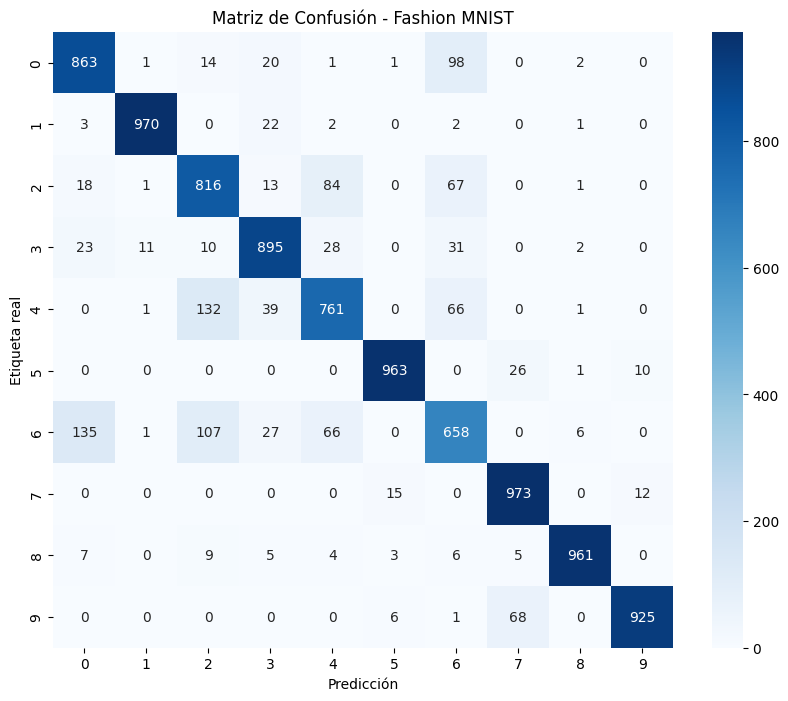


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.75      0.82      0.78      1000
           3       0.88      0.90      0.89      1000
           4       0.80      0.76      0.78      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.66      0.68      1000
           7       0.91      0.97      0.94      1000
           8       0.99      0.96      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from sklearn.metrics import confusion_matrix, classification_report

# Cargar el dataset Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los valores de los píxeles (de 0-255 a 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convertir la imagen en un vector
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    keras.layers.Dropout(0.2),  # Regularización para evitar sobreajuste
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Medir el tiempo de entrenamiento
start = time.time()

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

finish = time.time()
print(f"Tiempo de entrenamiento: {finish-start:.2f} segundos")

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

# Obtener predicciones
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mostrar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Fashion MNIST")
plt.show()

# Mostrar reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_classes))


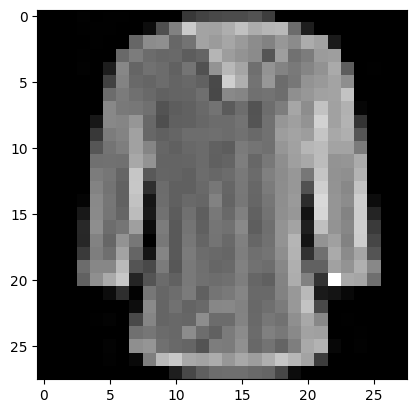

In [2]:
plt.imshow(x_test[4], cmap="gray")
plt.show()

